In [1]:
pwd

'/media/s0umyajit/8ABC901ABC9002BD/Ds_ml_repos/Ds_whatsapp_tut_assignment/Assignment_1_Intermediate/Data_analysis_of_heart_disease'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('./Heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.shape

(303, 14)

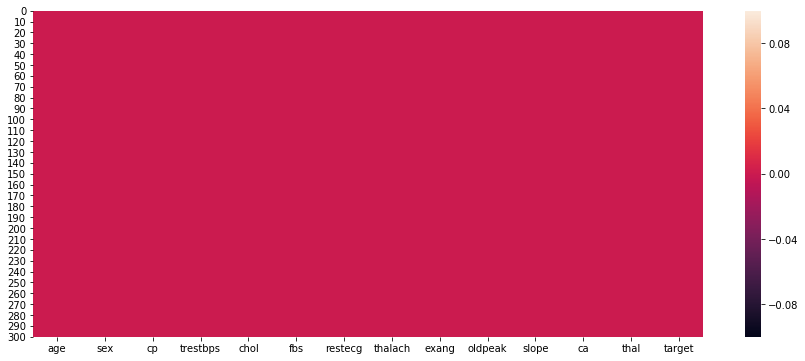

In [7]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull())
#no null values in the data set

## 1.Number of people suffering from heart disease 

In [8]:
s=0
for i in df['target']:
    if (i==1):
        s=s+1
    else:
        continue
print(s)
#165 People suffer from heart disease

165


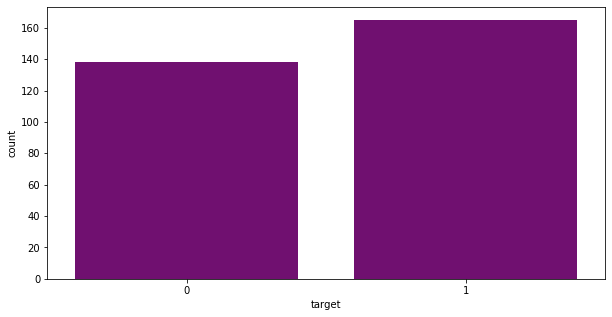

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['target'],color='purple')

## 2.Number of male and female having heart disease

In [10]:
m=0
for i in df.index:
    if(df['sex'][i]==1 and df['target'][i]==1):
        m=m+1
    else:
        continue
print(m)
#93 male are suffering from heart disease   

93


In [11]:
f=0
for i in df.index:
    if(df['sex'][i]==0 and df['target'][i]==1):
        f=f+1
    else:
        continue
print(f)
#72 female are suffering from heart disease

72


In [12]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [26]:
df1=df.groupby('sex')['target'].value_counts()
df1

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

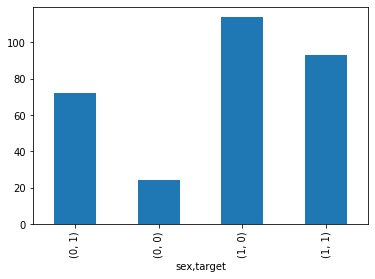

In [30]:
df1.plot.bar()

## 3.Visualize frequency distribution of the thalach variable and find what's the heart rate and heartdisesease relation?


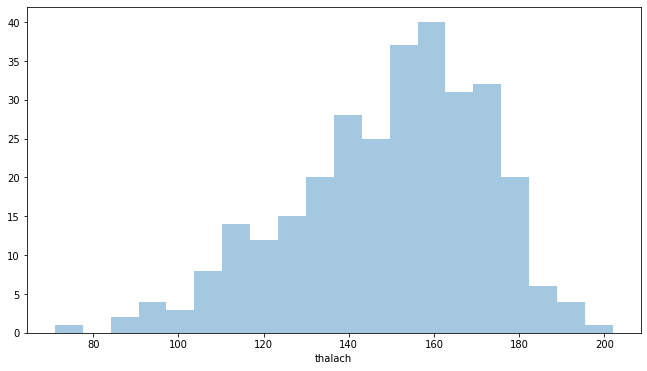

In [15]:
plt.figure(figsize=(11,6))
sns.distplot(df['thalach'],kde=False,bins=20)
#maximum have a thalach between 160-170 i.e person having heart rate 160-170 suffer from heart disease

## 4.Find correlation matrix for all the variables with target.


In [16]:
correlation=df.corr()
print(correlation['target'].sort_values(ascending=False))

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


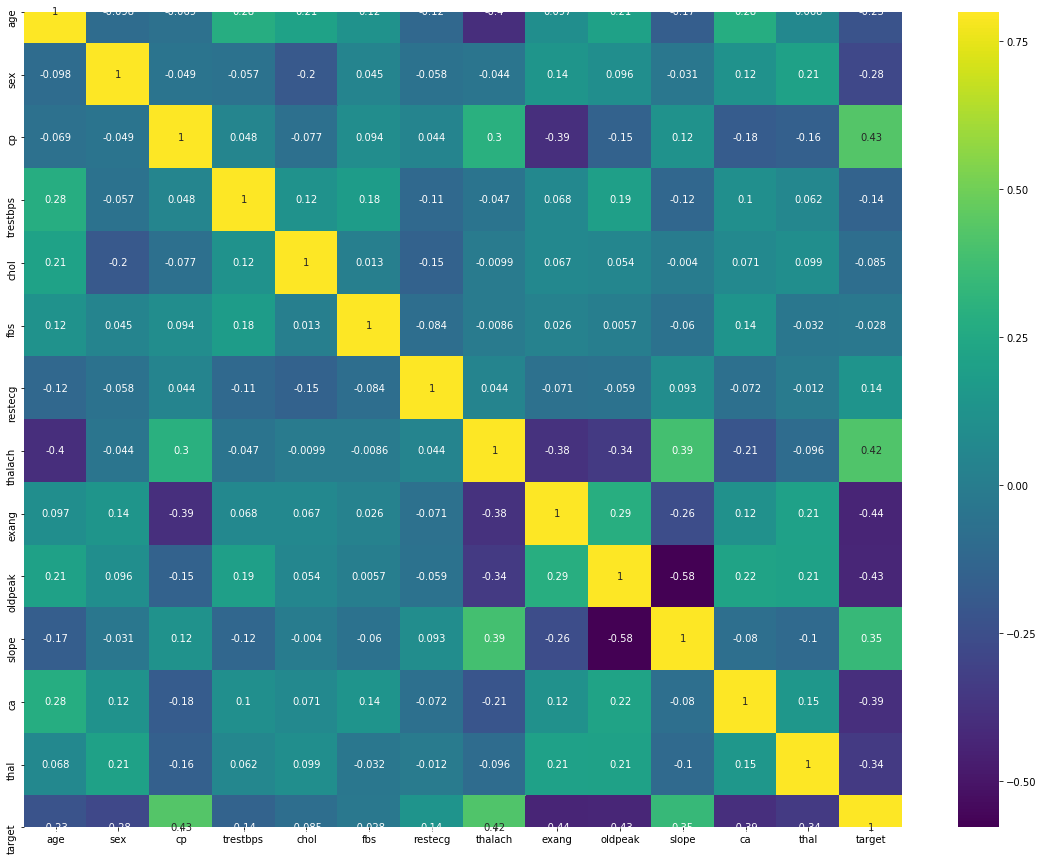

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation,annot=True,cmap='viridis',square=True,vmax=0.8)

## 5.Find Mean,Min & Max of age and plot its distribution

In [34]:
df.groupby('target')['age'].max()

target
0    77
1    76
Name: age, dtype: int64

In [35]:
df.groupby('target')['age'].min()

target
0    35
1    29
Name: age, dtype: int64

In [36]:
df.groupby('target')['age'].mean()

target
0    56.601449
1    52.496970
Name: age, dtype: float64

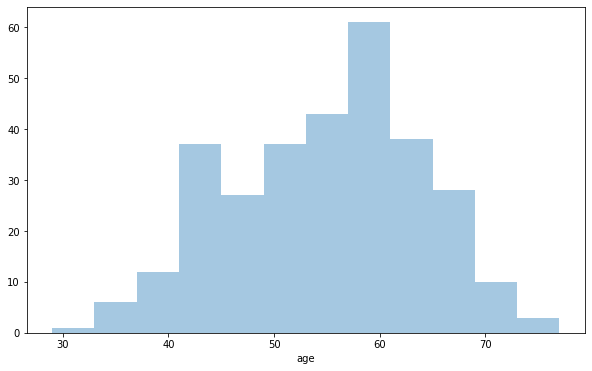

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(df['age'],kde=False)

## 6.Age and its relation to heart disease. Are young people more prone to heart disease?


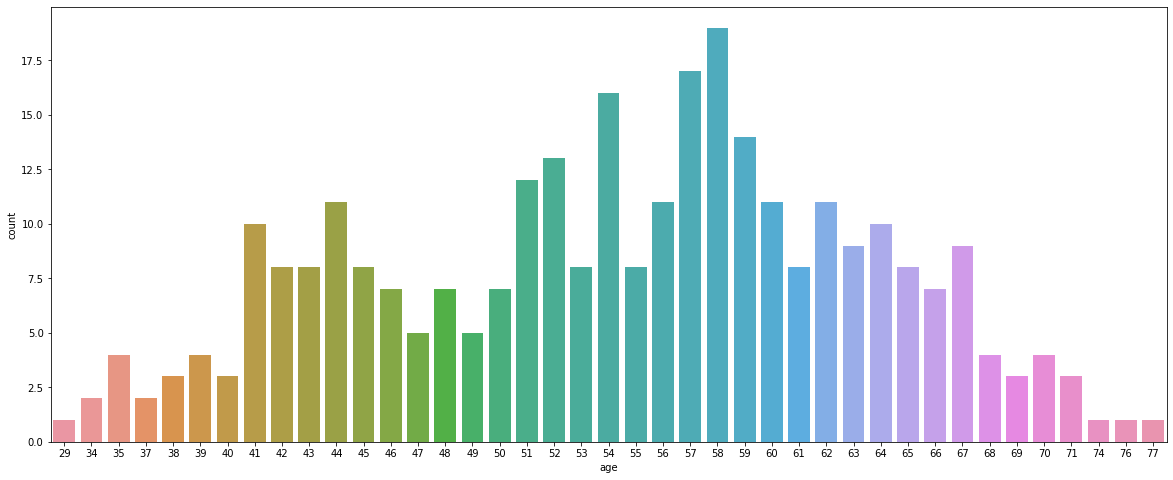

In [20]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['age'])
#age of 52 - 60 are more prone to heart disease

In [33]:
df.groupby('target')['age'].value_counts()

target  age
0       58     12
        57     10
        59      9
        60      8
        61      7
               ..
1       40      1
        61      1
        70      1
        74      1
        76      1
Name: age, Length: 75, dtype: int64

## 7.Plot chest pain type pie chart


In [22]:
df1=df['cp'].value_counts()
df1

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

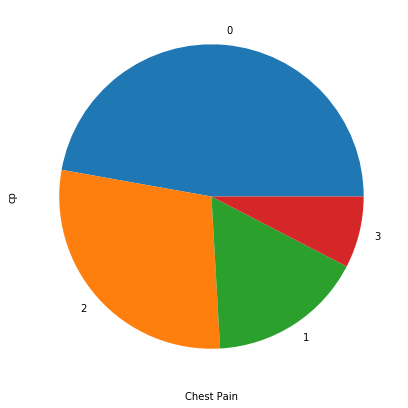

In [23]:
plt.figure(figsize=(10,7))
plt.xlabel('Chest Pain')
df1.plot.pie()

## 8.What is the max heart rate achieved in non heart disease patients?


In [24]:
mx=0
for i in df.index:
    if (df['target'][i]==0):
        if(df['thalach'][i]>mx):
            mx=df['thalach'][i]
    else:
        continue
        
print(mx)
#max heart rate achived is 195

195


In [37]:
df.groupby('target')['thalach'].max()

target
0    195
1    202
Name: thalach, dtype: int64